In [2]:
import geopandas as gpd
# !conda install rasterio
import rasterio
from rasterio.plot import show
# from PIL import Image
import pandas as pd
import numpy as np
import pyproj

In [2]:
# this the address on my own system
sl = "C:/Users/zahraeftekhar/PycharmProjects/TRAIL-Data-Science-Bootcamp-course/Datasets/"


In [ ]:
hospitals = gpd.read_file("Datasets/Hospitals_VNM.geojson")
Road = gpd.read_file("{a}Road_Network_VNM.geojson".format(a=sl))
Boundaries =gpd.read_file("{a}Vietnam_Administrative_Boundaries.geojson".format(a=sl))
# Boundaries.to_file("Datasets/Boundaries.shp")

In [4]:
Boundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:

# fp = r'{a}Flood Risk/floodMapGL_rp10y/floodMapGL_rp10y.tif'.format(a=sl)
# img = rasterio.open("Genode_Vietnam.tif")
img = rasterio.open("Datasets/Flood Risk/floodMapGL_rp10y/floodMapGL_rp10y.tif")
# array = img.read(1)

In [17]:
# img.bounds
# type(img)
# array = img.read(1)
# array.plot()
# img2 = img.transform * (0, 0)
# img.transform * (img.width, img.height)
# img.crs
# type(img2)
(array).shape

(180, 88)

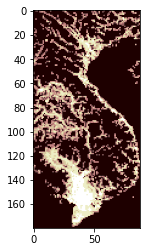

In [19]:
from matplotlib import pyplot
pyplot.imshow(array, cmap='pink')
pyplot.show()


In [27]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open("Datasets/Flood Risk/floodMapGL_rp10y/floodMapGL_rp10y.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):
        
        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
#         print(geom)


In [28]:
geoFile = pd.DataFrame.from_dict(geom)
# geoFile.iloc[0,1]
geoFile.head()

,type,coordinates
0,Polygon,"[[-166.799988, 83.225098], [-166.799988, -54.0..."
1,Polygon,"[[-77.449988, 83.091764], [-77.449988, 83.0834..."
2,Polygon,"[[-70.416654, 81.800098], [-70.416654, 81.7917..."
3,Polygon,"[[-70.241654, 81.775098], [-70.241654, 81.7667..."
4,Polygon,"[[-69.866654, 81.766764], [-69.866654, 81.7584..."


In [11]:
risk = gpd.read_file('Datasets/Flood Risk/riskRoad/riskRoad_1.shp')



<AxesSubplot:>

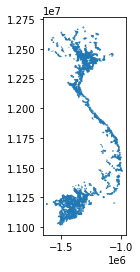

In [16]:
risk
highRisk = risk[risk.gridcode>2]
highRisk.plot()